In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-data/sample_submission.csv
/kaggle/input/fraud-data/test_identity.csv
/kaggle/input/fraud-data/train_identity.csv
/kaggle/input/fraud-data/test_transaction.csv
/kaggle/input/fraud-data/train_transaction.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# IMPORTS

In [3]:
!pip install dagshub mlflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 6.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 54.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.utils import resample
import shap
import dagshub
from sklearn.base import clone as sk_clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import mlflow

In [5]:
dagshub.init(repo_owner='gkuch22', repo_name='ml-hw2-gkuch22', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=345bd7db-d77b-4a74-a30a-ed9f9d1a6c9b&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=21ddca7b5f8fc0fda0a493d40c7d52473499f9f57cff496842d5a0b27dbca9be




Accessing as gkuch22

Initialized MLflow to track repo "gkuch22/ml-hw2-gkuch22"

Repository gkuch22/ml-hw2-gkuch22 initialized!

# DATA INSPECTION

In [6]:
df_transaction = pd.read_csv('/kaggle/input/fraud-data/train_transaction.csv')
df_identity = pd.read_csv('/kaggle/input/fraud-data/train_identity.csv')
df_transaction.shape, df_identity.shape

((590540, 394), (144233, 41))

# DATA MERGE

In [7]:
df_transaction

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [8]:
df_identity

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,27.0,567.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,15.0,352.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [9]:
df = df_transaction.merge(df_identity, how='left', on='TransactionID')
df['key_id'] = (
    df['card1'].astype(str) + '_' +
    df['addr1'].astype(str) + '_' +
    df['P_emaildomain'].fillna('unknown').astype(str) + '_' +
    df['DeviceType'].astype(str)
)


In [10]:
df.shape

(590540, 435)

In [11]:
df['key_id'].nunique()

109213

# UNDER SAMPLING

In [12]:
df.shape

(590540, 435)

In [13]:
fraud_df = df[df['isFraud'] == 1]
non_fraud_df = df[df['isFraud'] == 0]

non_fraud_undersampled = resample(non_fraud_df, replace=False, n_samples=3*len(fraud_df), random_state=42)

df_undersampled = pd.concat([fraud_df, non_fraud_undersampled])

df = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
fraud_df.shape

(20663, 435)

In [15]:
df.shape

(82652, 435)

# DATA SPLIT

In [16]:
gss1 = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_valid_idx, test_idx = next(gss1.split(df, groups=df['key_id']))

train_valid_df = df.iloc[train_valid_idx]
test_df = df.iloc[test_idx]

gss2 = GroupShuffleSplit(n_splits=1, train_size=0.75, random_state=42)
train_idx, valid_idx = next(gss2.split(train_valid_df, groups=train_valid_df['key_id']))

train_df = train_valid_df.iloc[train_idx]
valid_df = train_valid_df.iloc[valid_idx]

X_train = train_df.drop(columns='isFraud')
y_train = train_df['isFraud']

X_valid = valid_df.drop(columns='isFraud')
y_valid = valid_df['isFraud']

X_test = test_df.drop(columns='isFraud')
y_test = test_df['isFraud']

In [17]:
X_train.shape, X_valid.shape, X_test.shape

((50329, 434), (16218, 434), (16105, 434))

In [18]:
X_train

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,key_id
1,3455892,12085975,29.000,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,10.0,NaN,yahoo.com,NaN,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,39.0,39.0,1.0,39.0,13.0,NaN,NaN,NaN,NaN,13.0,39.0,NaN,NaN,NaN,39.0,T,T,T,M0,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,66.0,29.0,0.0,66.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,297.000000,29.000000,0.0,178.0,0.0,29.0,29.0,178.000000,29.0,0.0,119.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12695_325.0_yahoo.com_nan
3,3231066,5790525,107.950,W,17399,111.0,150.0,mastercard,

# TRAINING

In [19]:
# import mlflow
# from sklearn.base import clone as sk_clone
# from itertools import product
# from xgboost import XGBClassifier


# logged_model = 'runs:/582efd80ff784537ac9bb1899d586167/cleaning_pipeline'
# cleaning = mlflow.sklearn.load_model(logged_model)

# logged_model = 'runs:/f5cd3ddfd3424719967852382ccce82c/engineering_pipeline'
# engineering = mlflow.sklearn.load_model(logged_model)
# engineering.set_params(scaler='passthrough')

# nunique_thresholds = [0.7]
# nan_thresholds = [0.9]
# onehot_thresholds = [5]
# imputers = ['mean']
# scalers = {'standard': StandardScaler()}
# corr_thresholds = [0.9]

# learning_rate_thresholds = [0.05]
# n_estimators = [800]
# max_depths = [5]

# best_pipeline = None
# best_roc_auc = 0
# best_params = None

# for uniquet in nunique_thresholds:
#     for nant in nan_thresholds:
#         for oht in onehot_thresholds:
#             for imputer in imputers:
#                 for scaler_name, scaler in scalers.items():
#                     for nest, corr, lrt, md in product(n_estimators, corr_thresholds, learning_rate_thresholds, max_depths):
#                         print()
#                         print(f'uniquet={uniquet}, nt={nant}, oht={oht}, imputer={imputer}, scaler={scaler_name}')
#                         print(f'nest={nest}, corr={corr}, lrt={lrt}, md={md}')
                        
#                         cleaning_pipeline = sk_clone(cleaning)
#                         engineering_pipeline = sk_clone(engineering)
                        
#                         cleaning_pipeline.named_steps['nunique_handler'].threshold = uniquet
#                         cleaning_pipeline.named_steps['nan_handler'].threshold = nant
    
#                         engineering_pipeline.named_steps['onehot_encoder'].threshold = oht
#                         engineering_pipeline.named_steps['imputer'].strategy = imputer

#                         model = XGBClassifier(
#                             n_estimators=nest,
#                             learning_rate=lrt,
#                             max_depth = md,
#                             reg_lambda=0.1,
#                             eval_metric='auc',
#                             random_state=42
#                         )
                        
#                         pipeline = Pipeline(steps=[
#                             ('cleaning', cleaning_pipeline),
#                             ('engineering', engineering_pipeline),
#                             # ('selection', CustomCorrHandlerClass(corr)),
#                             ('scaler', clone(scaler)),
#                             ('model', model)
#                         ])
                        
#                         pipeline.fit(X_train, y_train)
                        
#                         y_train_pred = pipeline.predict(X_train)
#                         y_train_prob = pipeline.predict_proba(X_train)[:, 1]

#                         train_roc_auc = roc_auc_score(y_train, y_train_prob)
#                         train_accuracy = accuracy_score(y_train, y_train_pred)
#                         train_precision = precision_score(y_train, y_train_pred)
#                         train_recall = recall_score(y_train, y_train_pred)
#                         train_f1 = f1_score(y_train, y_train_pred)
#                         print("TRAIN")
#                         print(f"ROC AUC Score: {train_roc_auc}")
#                         print(f"F1 Score: {train_f1}")
#                         print(f"Recall: {train_recall}")
#                         print(f"Precision: {train_precision}")
#                         print(f"Accuracy: {train_accuracy}")
                        
                        
#                         y_valid_pred = pipeline.predict(X_valid)
#                         y_valid_prob = pipeline.predict_proba(X_valid)[:, 1]
                        
#                         valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
#                         valid_accuracy = accuracy_score(y_valid, y_valid_pred)
#                         valid_precision = precision_score(y_valid, y_valid_pred)
#                         valid_recall = recall_score(y_valid, y_valid_pred)
#                         valid_f1 = f1_score(y_valid, y_valid_pred)
#                         print("VALID")
#                         print(f"ROC AUC Score: {valid_roc_auc}")
#                         print(f"F1 Score: {valid_f1}")
#                         print(f"Recall: {valid_recall}")
#                         print(f"Precision: {valid_precision}")
#                         print(f"Accuracy: {valid_accuracy}")
    
#                         if valid_roc_auc > best_roc_auc:
#                             best_roc_auc = valid_roc_auc
#                             best_pipeline = pipeline
#                             best_params = (uniquet, nant, oht, imputer, scaler_name, nest, corr, lrt, md)

# print()
# print("-------------------------")
# print("best params:", best_params)


In [20]:
import mlflow
logged_model = 'runs:/582efd80ff784537ac9bb1899d586167/cleaning_pipeline'
cleaning = mlflow.sklearn.load_model(logged_model)

# logged_model = 'runs:/f5cd3ddfd3424719967852382ccce82c/engineering_pipeline'
logged_model = 'runs:/08991dbf0e10470393b8cc9302799861/engineering_pipeline'
engineering = mlflow.sklearn.load_model(logged_model)
# engineering.set_params(imputer='passthrough', scaler='passthrough')

In [21]:
import mlflow
from sklearn.base import clone as sk_clone
from itertools import product
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


param_grid = {
    'cleaning__nunique_handler__threshold': [0.7],
    'cleaning__nan_handler__threshold': [0.9],
    'engineering__onehot_encoder__threshold': [5],
    
    'model__n_estimators': [150],
    'model__learning_rate': [0.05],
    'model__max_depth': [4],
    'model__reg_lambda': [0.1],
    'model__eval_metric': ['auc'],
    'model__random_state': [42]
}

pipeline = Pipeline(steps=[
    ('cleaning', sk_clone(cleaning)),
    ('engineering', sk_clone(engineering)),
    ('model', XGBClassifier())
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3),
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_


y_train_prob = best_pipeline.predict_proba(X_train)[:, 1]
# y_train_pred = best_pipeline.predict(X_train)
y_train_pred = (y_train_prob >= 0.25).astype(int)

train_roc_auc = roc_auc_score(y_train, y_train_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print("TRAIN")
print(f"ROC AUC Score: {train_roc_auc}")
print(f"F1 Score: {train_f1}")
print(f"Recall: {train_recall}")
print(f"Precision: {train_precision}")
print(f"Accuracy: {train_accuracy}")


y_valid_prob = best_pipeline.predict_proba(X_valid)[:, 1]
# y_valid_pred = best_pipeline.predict(X_valid)
y_valid_pred = (y_valid_prob >= 0.25).astype(int)


valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_precision = precision_score(y_valid, y_valid_pred)
valid_recall = recall_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)
print("VALID")
print(f"ROC AUC Score: {valid_roc_auc}")
print(f"F1 Score: {valid_f1}")
print(f"Recall: {valid_recall}")
print(f"Precision: {valid_precision}")
print(f"Accuracy: {valid_accuracy}")


print()
print("-------------------------")
print("best params:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
TRAIN
ROC AUC Score: 0.9276248033207806
F1 Score: 0.7572281190808048
Recall: 0.8247567146749708
Precision: 0.6999207188160677
Accuracy: 0.8650281150032785
VALID
ROC AUC Score: 0.8724116588735717
F1 Score: 0.6721014492753623
Recall: 0.6409180651530109
Precision: 0.706474428726877
Accuracy: 0.8437538537427549

-------------------------
best params:
cleaning__nan_handler__threshold: 0.9
cleaning__nunique_handler__threshold: 0.7
engineering__onehot_encoder__threshold: 5
model__eval_metric: auc
model__learning_rate: 0.05
model__max_depth: 4
model__n_estimators: 150
model__random_state: 42
model__reg_lambda: 0.1


# ANALYSIS

In [22]:
print(X_train.shape)
pipeline = Pipeline(steps=[
    ('cleaning', cleaning),
    ('engineering', engineering),
])
pipeline.fit(X_train, y_train)
X_train_transformed = pipeline.transform(X_train)
X_train_transformed.shape

(50329, 434)


(50329, 364)

In [23]:
import matplotlib.pyplot as plt

X_train_transformed = best_pipeline[:-1].transform(X_train)
feature_names = X_train_transformed.columns.tolist()

best_model = best_pipeline.named_steps['model']

explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_transformed)

mean_abs_shap = np.abs(shap_values.values).mean(0)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
feature_importance.head(20)

,feature,importance
150,key_id_woe,0.685572
8,C1,0.250145
18,C14,0.221041
48,V91,0.168505
2,TransactionAmt,0.154025
16,C11,0.121266
44,V70,0.120000
86,V308,0.104771
20,D2,0.090497
0,TransactionID,0.087140


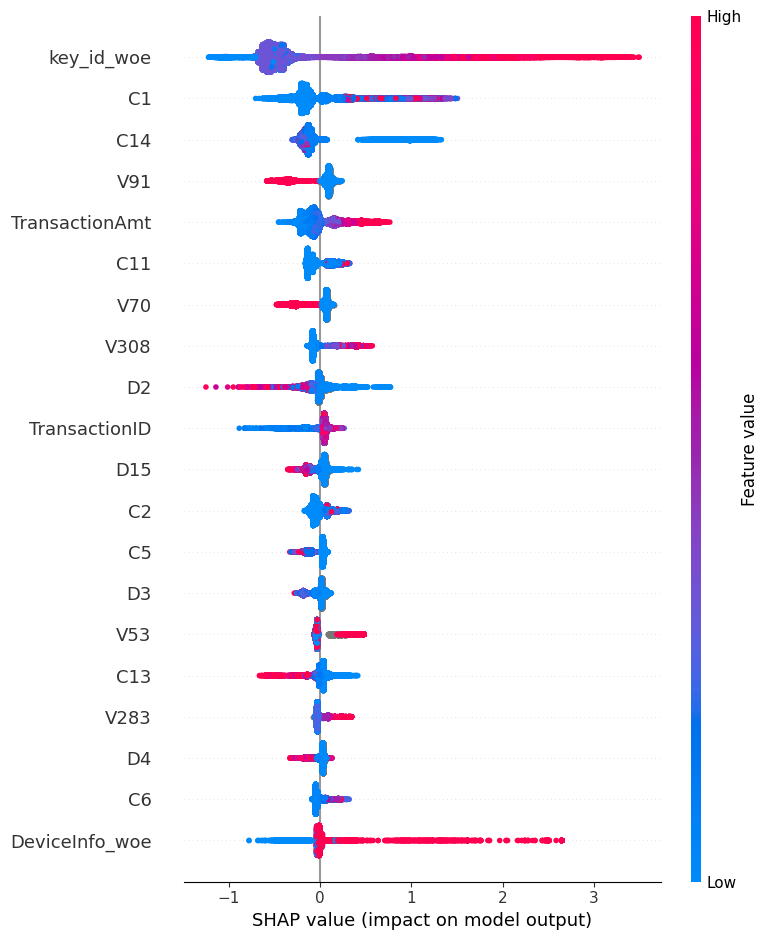

In [24]:
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_train_transformed, show=False)

In [25]:
top_n = 10
top_features = feature_importance.head(top_n)['feature'].tolist()
print(top_features)

['key_id_woe', 'C1', 'C14', 'V91', 'TransactionAmt', 'C11', 'V70', 'V308', 'D2', 'TransactionID']


In [26]:
class CustomSHAPSelectorClass(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        available_features = [f for f in self.feature_names if f in X.columns]
        return X[available_features]

In [27]:
import mlflow
from sklearn.base import clone as sk_clone
from itertools import product
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


param_grid = {
    'cleaning__nunique_handler__threshold': [0.7],
    'cleaning__nan_handler__threshold': [0.9],
    'engineering__onehot_encoder__threshold': [5],
    
    'model__n_estimators': [150],
    'model__learning_rate': [0.05],
    'model__max_depth': [4],
    'model__reg_lambda': [0.1],
    'model__eval_metric': ['auc'],
    'model__random_state': [42]
}

pipeline = Pipeline(steps=[
    ('cleaning', sk_clone(cleaning)),
    ('engineering', sk_clone(engineering)),
    ('selector', CustomSHAPSelectorClass(top_features)),
    ('model', XGBClassifier())
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3),
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_


y_train_prob = best_pipeline.predict_proba(X_train)[:, 1]
# y_train_pred = best_pipeline.predict(X_train)
y_train_pred = (y_train_prob >= 0.25).astype(int)

train_roc_auc = roc_auc_score(y_train, y_train_prob)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print("TRAIN")
print(f"ROC AUC Score: {train_roc_auc}")
print(f"F1 Score: {train_f1}")
print(f"Recall: {train_recall}")
print(f"Precision: {train_precision}")
print(f"Accuracy: {train_accuracy}")


y_valid_prob = best_pipeline.predict_proba(X_valid)[:, 1]
# y_valid_pred = best_pipeline.predict(X_valid)
y_valid_pred = (y_valid_prob >= 0.25).astype(int)


valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_precision = precision_score(y_valid, y_valid_pred)
valid_recall = recall_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)
print("VALID")
print(f"ROC AUC Score: {valid_roc_auc}")
print(f"F1 Score: {valid_f1}")
print(f"Recall: {valid_recall}")
print(f"Precision: {valid_precision}")
print(f"Accuracy: {valid_accuracy}")


print()
print("-------------------------")
print("best params:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
TRAIN
ROC AUC Score: 0.9108117265364739
F1 Score: 0.7243266141843472
Recall: 0.7986765278318412
Precision: 0.6626404857253585
Accuracy: 0.8448409465715592
VALID
ROC AUC Score: 0.8517516876203632
F1 Score: 0.6480216522747777
Recall: 0.6204343534057256
Precision: 0.6781764229835446
Accuracy: 0.8316068565791096

-------------------------
best params:
cleaning__nan_handler__threshold: 0.9
cleaning__nunique_handler__threshold: 0.7
engineering__onehot_encoder__threshold: 5
model__eval_metric: auc
model__learning_rate: 0.05
model__max_depth: 4
model__n_estimators: 150
model__random_state: 42
model__reg_lambda: 0.1


# ENGINEERING FOR XGBOOST

In [28]:
# class CustomCategoricalEncoderClass(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold, encoder):
#         self.threshold = threshold
#         self.encoder = encoder
#         self.cols = []
    
#     def fit(self, X, y):
#         self._encoder = clone(self.encoder)

#         self.cols = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique() <= self.threshold]

#         if self.cols:
#             self._encoder.fit(X[self.cols])
        
#         return self
    
#     def transform(self, X):
#         X = X.copy()
                
#         if not self.cols:
#             return X

#         encoded = self._encoder.transform(X[self.cols])
#         encoded_df = pd.DataFrame(
#             encoded,
#             index=X.index,
#             columns=self._encoder.get_feature_names_out(self.cols)
#         )
        
#         X = X.drop(columns=self.cols)
#         return pd.concat([X, encoded_df], axis=1)


In [29]:
# class CustomWoeEncoderClass(BaseEstimator, TransformerMixin):
#     def __init__(self, target_col):
#         self.target_col = target_col
#         self.cat_columns = []
#         self.woe_mappings = {}
        
#     def fit(self, X, y):
#         df = X.copy()
#         df[self.target_col] = y

#         self.cat_columns = [col for col in df.columns if df[col].dtype == 'object']

#         for col in self.cat_columns:
#             groups = df.groupby([col])[self.target_col].agg(['count', 'sum'])
#             groups.columns = ['n_obs', 'n_pos']
#             groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
#             groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
#             groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
#             with np.errstate(divide='ignore', invalid='ignore'):
#                 groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            
#             groups.replace([np.inf, -np.inf], 0, inplace=True)
#             groups.fillna(0, inplace=True)
            
#             woe_dict = groups['woe'].to_dict()
            
#             self.woe_mappings[col] = woe_dict
                    
#         return self
        
    
#     def transform(self, X):
#         df = X.copy()
#         for col in self.cat_columns:
#             mapping = self.woe_mappings.get(col)
#             df[f"{col}_woe"] = df[col].map(mapping).fillna(0)
#         # return df.drop(columns=[col for col in self.cat_columns if col in df.columns], errors='ignore')
#         return df.drop(columns=self.cat_columns)

In [30]:
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# engineering_pipeline = Pipeline(steps=[
#     ('onehot_encoder', CustomCategoricalEncoderClass(threshold=5, encoder=encoder)),
#     ('woe_encoder', CustomWoeEncoderClass('isFraud'))
# ])

In [31]:
# experiment_name = "XGBoost_Training"
# run_name = "XGBoost_Engineering"

# import mlflow

# mlflow.set_experiment(experiment_name)

# with mlflow.start_run(run_name=run_name):

#     mlflow.log_param("categorical_threshold", 5)
#     mlflow.log_param("onehot_encoder", "OneHotEncoder")
#     mlflow.log_param("woe_encoder", "WoeEncoder")
    
#     engineering_pipeline.fit(X_train, y_train)

#     mlflow.sklearn.log_model(engineering_pipeline, "engineering_pipeline")

# MLFLOW TRACKING

In [172]:
experiment_name = "XGBoost_Training"
run_name = "XGBoost_Best_Model_Key_Id"

In [173]:
import mlflow

mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):

    mlflow.log_param("nunique_threshold", 0.7)
    mlflow.log_param("nan_threshold", 0.9)
    mlflow.log_param("categorical_threshold", 5)
    mlflow.log_param("a_encoder", "OneHotEncoder")
    mlflow.log_param("b_encoder", "WoeEncoder")
    mlflow.log_param("imputer_strategy", "mean")
    mlflow.log_param("scaler", "standard")
    
    mlflow.log_param("n_estimators", 150)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("max_depth", 4)
    mlflow.log_param("reg_lambda", 0.1)
    
    mlflow.log_param("predict_threshold", 0.25)

    mlflow.log_param("model_type", "XGBoost")
    

    # grid searchshi migebul best_pipeline s viyeneb aq
    
    y_train_prob = best_pipeline.predict_proba(X_train)[:, 1]
    # y_train_pred = best_pipeline.predict(X_train)
    y_train_pred = (y_train_prob >= 0.25).astype(int)
    
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    print("TRAIN")
    print(f"ROC AUC Score: {train_roc_auc}")
    print(f"F1 Score: {train_f1}")
    print(f"Recall: {train_recall}")
    print(f"Precision: {train_precision}")
    print(f"Accuracy: {train_accuracy}")
    
    
    y_valid_prob = best_pipeline.predict_proba(X_valid)[:, 1]
    # y_valid_pred = best_pipeline.predict(X_valid)
    y_valid_pred = (y_valid_prob >= 0.25).astype(int)
    
    
    valid_roc_auc = roc_auc_score(y_valid, y_valid_prob)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_precision = precision_score(y_valid, y_valid_pred)
    valid_recall = recall_score(y_valid, y_valid_pred)
    valid_f1 = f1_score(y_valid, y_valid_pred)
    print("VALID")
    print(f"ROC AUC Score: {valid_roc_auc}")
    print(f"F1 Score: {valid_f1}")
    print(f"Recall: {valid_recall}")
    print(f"Precision: {valid_precision}")
    print(f"Accuracy: {valid_accuracy}")
    
    
    mlflow.log_metric("roc_auc/train", train_roc_auc)
    mlflow.log_metric("roc_auc/valid", valid_roc_auc)
    
    mlflow.log_metric("f1/train", train_f1)
    mlflow.log_metric("f1/valid", valid_f1)
    
    mlflow.log_metric("recall/train", train_recall)
    mlflow.log_metric("recall/valid", valid_recall)
    
    mlflow.log_metric("precision/train", train_precision)
    mlflow.log_metric("precision/valid", valid_precision)
    
    mlflow.log_metric("accuracy/train", train_accuracy)
    mlflow.log_metric("accuracy/valid", valid_accuracy)

    mlflow.sklearn.log_model(best_pipeline, "model")


TRAIN
ROC AUC Score: 0.9276248033207806
F1 Score: 0.7572281190808048
Recall: 0.8247567146749708
Precision: 0.6999207188160677
Accuracy: 0.8650281150032785
VALID
ROC AUC Score: 0.8724116588735717
F1 Score: 0.6721014492753623
Recall: 0.6409180651530109
Precision: 0.706474428726877
Accuracy: 0.8437538537427549


2025/04/27 15:52:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_Best_Model_Key_Id at: https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow/#/experiments/4/runs/1079f76c0d1e40bc89b8628e8d0f7505
🧪 View experiment at: https://dagshub.com/gkuch22/ml-hw2-gkuch22.mlflow/#/experiments/4
